<a href="https://colab.research.google.com/github/leeyeonho1001/DL/blob/main/Predict_Amazon_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# 데이터셋 불러오기
dataset = pd.read_csv('AMZN (1).csv', index_col = 'Date')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-20,6.3565,6.4600,6.254,6.2890,6.2890,181494000
2010-01-21,6.3630,6.4075,6.250,6.3310,6.3310,199412000
2010-01-22,6.2800,6.3835,6.038,6.0715,6.0715,231378000
2010-01-25,6.1050,6.1140,5.906,6.0155,6.0155,240478000
2010-01-26,6.0280,6.1490,5.953,5.9740,5.9740,191180000


In [ ]:
# train_set, test_set 나누기
training_set = dataset[:'2022'].iloc[:,4:5].values
test_set = dataset['2023':].iloc[:,4:5].values

print(len(training_set))
print(len(test_set))

3010
263


In [ ]:
# MinMaxScaler로 training_set_scaled 정의
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# training_set 정규화
X_train = []
y_train = []

for i in range(60, len(training_set)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [ ]:
# LSTM 모델 생성
regressor = Sequential()
# First layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Third layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Output layer
regressor.add(Dense(units = 1))
# 모델 컴파일링 및 훈련
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
93/93 [==============================] - 21s 117ms/step - loss: 0.0098
Epoch 2/40
93/93 [==============================] - 13s 145ms/step - loss: 0.0044
Epoch 3/40
93/93 [==============================] - 12s 134ms/step - loss: 0.0036
Epoch 4/40
93/93 [==============================] - 19s 201ms/step - loss: 0.0032
Epoch 5/40
93/93 [==============================] - 24s 253ms/step - loss: 0.0030
Epoch 6/40
93/93 [==============================] - 19s 207ms/step - loss: 0.0025
Epoch 7/40
93/93 [==============================] - 25s 264ms/step - loss: 0.0025
Epoch 8/40
93/93 [==============================] - 21s 229ms/step - loss: 0.0023
Epoch 9/40
93/93 [==============================] - 20s 215ms/step - loss: 0.0022
Epoch 10/40
93/93 [==============================] - 18s 197ms/step - loss: 0.0022
Epoch 11/40
93/93 [==============================] - 22s 233ms/step - loss: 0.0022
Epoch 12/40
93/93 [==============================] - 21s 223ms/step - loss: 0.0018
Epoch 13/40
9

In [ ]:
# test_set의 입력 데이터 inputs 정의
target = dataset['Adj Close']
inputs = target[len(target)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
# test_set 정규화 후 예측
X_test = []
for i in range(60, len(test_set)+ 60):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

9/9 [==============================] - 3s 46ms/step


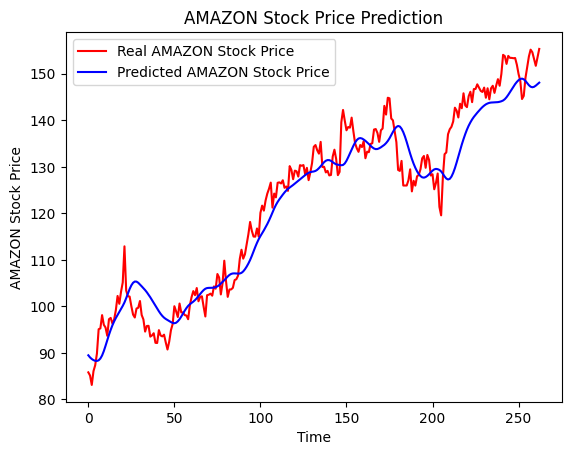

In [ ]:
# 실제 값과 예측 값 그래프 시각화
def plot_prediction(test, predicted):
  plt.plot(test, color = 'red', label = 'Real AMAZON Stock Price')
  plt.plot(predicted, color = 'blue', label = 'Predicted AMAZON Stock Price')
  plt.title('AMAZON Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('AMAZON Stock Price')
  plt.legend()
  plt.show

plot_prediction(test_set, predicted)

In [ ]:
# 모델의 rmse 구하기
def return_mse(test, predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print('The root mean squared error is {}.'.format(rmse))

return_mse(test_set, predicted)

The root mean squared error is 5.037228190622944.
